# Study of the effects of parameter tunning in forecasting values of a simple sine wave function using a LSTM model 

LSTM or Long Short term Memory is a kind of RNN (recurrent neural network). The architecture of a traditional neural network includes an input, output and a number of hidden layers. A recurrent neural network, like the name suggest, uses the output state as an input as well. This allows the neural net to use some of it's history, what it had learn in previous stages to be used as part of the input. But when you want to go really far back to the past, this simple process can quickly become cubersome, if you had to save every little (usefull and not so usefull) detail from the past. Here is where LSTM add another cell, that in turns take care of deciding which details to forget, what details to keep and how to update the internal state making this proces a lot more efficient.

The aim of this project is to investigate how different parameters impact the forecasting of values of a simple sine function.

## List of contents

1. Generate the sine wave data

2. Model training, model evaluation and forecasting



### 1. Generate the sine wave data

In [1]:
# Import necessary libraries

import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Generate data

x = np.arange(0, 100, 0.1)
y = np.sin(x)

Scaling data helps the LSTM model to converge, so let's do that now.

In [3]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
y_scaled = scaler.fit_transform(y.reshape(-1, 1))

Now the data needs to be aranged in a certain format (a sequence) used by this kind of learning models. Now let's call a separate module to do the work

In [4]:
from sequence import create_sequences

In this step, we define the **number of past points** to create the sequence. Let's pick 50 past points. 

In [5]:
seq_length = 50  # Number of time steps to look back

X, y = create_sequences(y_scaled, seq_length)

Split the data into training and test sets

In [6]:
train_size = int(len(X) * 0.8)

X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

Finally, let's make sure the data has the correct shape to be feed to the model

In [7]:
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

### 2. Model training, model evaluation and forecasting

Again, the model building and training will be done calling a separate previously-made module

In [8]:
from LSTMmodel import build_and_train_lstm

In [9]:
model, summary = build_and_train_lstm(X_train, y_train)

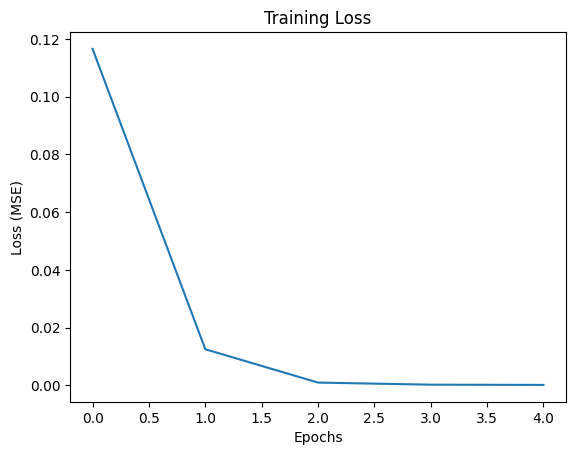

In [10]:
# Extract loss values
loss_values = summary.history['loss']

# Plot training loss over epochs
plt.plot(loss_values)
plt.xlabel('Epochs')
plt.ylabel('Loss (MSE)')
plt.title('Training Loss')
plt.show()


In [11]:
# Make predictions on the test set

predictions_scaled = model.predict(X_test)

6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 114ms/step


In [13]:
# Inverse transform the predictions and true values to get them back to original scale

predictions = scaler.inverse_transform(predictions_scaled)
y_test_actual = scaler.inverse_transform(y_test.reshape(-1, 1))

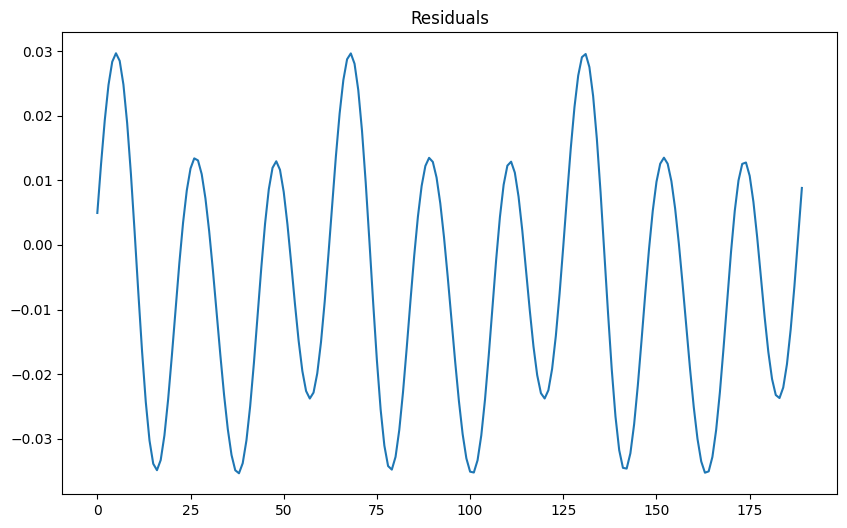

In [14]:
# Calculate residuals
residuals = y_test_actual - predictions

plt.figure(figsize=(10, 6))
plt.plot(residuals)
plt.title('Residuals')
plt.show()

From this plot it is clear to see that even though the errors are small, the residues have a repeating pattern, which indicates that the model does not fully capture the underlying data structure, but is consistently under and overfitting the data at regular intervals.

In [15]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error

In [16]:
loss_model_0 = model.evaluate(X_test, y_test, verbose=0)
mae_model_0 = mean_absolute_error(y_test, model.predict(X_test))
r2_model_0 = r2_score(y_test, model.predict(X_test))

print(loss_model_0)
print(f'R² Score: {r2_model_0:.5f}')
print(f'MAE: {mae_model_0:.5f}')




6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
[9.759715612744913e-05, 0.008429320529103279, 0.9992176294326782]
R² Score: 0.99922
MAE: 0.00843


In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(y_test_actual, label='True Values (Sine Wave)')
plt.plot(predictions, label='Predictions', linestyle='--')
plt.legend()
plt.title('True Values vs Predictions')
plt.show()


### Tunning model's parameters

#### Activation function

An activation function is a function that calculates the output of a node based on its inputs and their corresponding weights. Most commonly, activation fucntion are non-linear functions.

Different activation fucntions have different mathematical properties, and choosing an appropiate function depends on the task at hand as well. Aside from being linear or non linear functions other things to consider are the function's range, and if they are continious or differentiable functions.

An LSTM consists of a **cell state** (this is the long-term memory part) in which the long-term dependencies are stored and the **gates**, which regulate the information flow (this is the short-term control mechanism). Each gate in turn consist of a *forget gate* (decides which part of the current state should be discarded), an *input gate* (which part of the state should be updated) an a *output gate* which controls the hidden state output.

The activation function specified in the code controls the cell state. The LSTM gates always use sigmoid by default in Keras.

In this regard, the default setup (tanh for activations, sigmoid for gates) is already a good option for sine wave forecasting.

What would happen if instead of a bound function like tanh I choose reLU as activation function?

<ins>model 1</ins>: choose reLU as activation function for the cell state update

In [17]:
model_1, summary_1 = build_and_train_lstm(X_train, y_train, activation='relu')

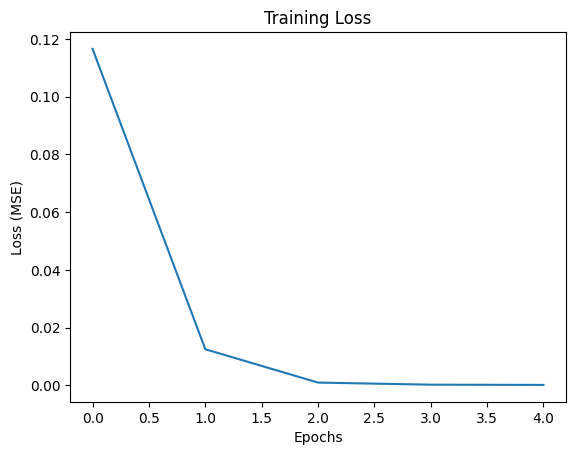

In [18]:
# Extract loss values
loss_values_1 = summary_1.history['loss']

# Plot training loss over epochs
plt.plot(loss_values)
plt.xlabel('Epochs')
plt.ylabel('Loss (MSE)')
plt.title('Training Loss')
plt.show()

In [19]:
# Make predictions on the test set

predictions_scaled = model_1.predict(X_test)

6/6 ━━━━━━━━━━━━━━━━━━━━ 2s 200ms/step


In [20]:
# Inverse transform the predictions and true values to get them back to original scale

predictions = scaler.inverse_transform(predictions_scaled)
y_test_actual = scaler.inverse_transform(y_test.reshape(-1, 1))

In [21]:
loss_model_1 = model_1.evaluate(X_test, y_test, verbose=0)
print(loss_model_1)

[5.619964940706268e-05, 0.00620225491002202, 0.9995494484901428]


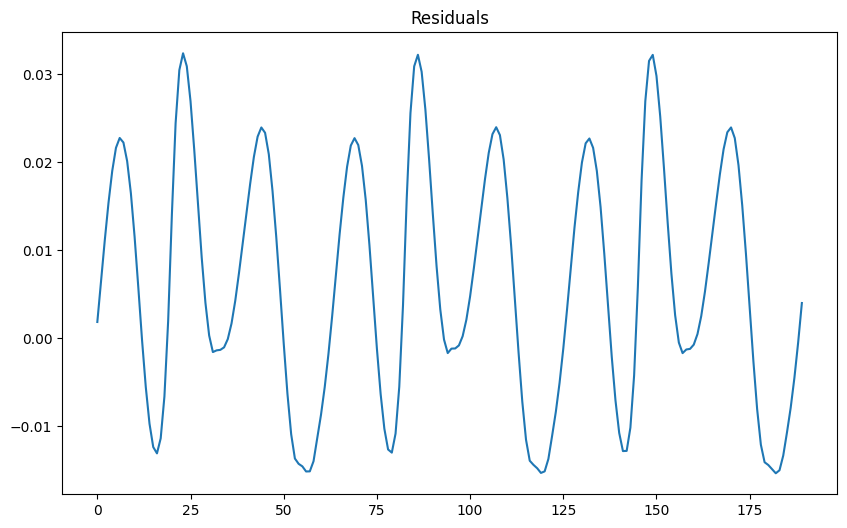

In [22]:
# Calculate residuals
residuals = y_test_actual - predictions

plt.figure(figsize=(10, 6))
plt.plot(residuals)
plt.title('Residuals')
plt.show()

In [23]:
mae_model_1 = mean_absolute_error(y_test, model_1.predict(X_test))
r2_model_1 = r2_score(y_test, model_1.predict(X_test))

print(f'R² Score: {r2_model_1:.5f}')
print(f'MAE: {mae_model_1:.5f}')

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
R² Score: 0.99955
MAE: 0.00620


In [24]:
import pandas as pd

# Model performance metrics
metrics = {
    "Metric": ["R² Score", "MAE"],
    "Model 0": [r2_model_0, mae_model_0],
    "Model 1": [r2_model_1, mae_model_1],
}

# Create DataFrame
df = pd.DataFrame(metrics)

# Calculate percentage improvement
# For R², higher is better, so we use (new - old) / old * 100
# For MAE, lower is better, so we use (old - new) / old * 100
df["Improvement (%)"] = [
    ((df.loc[0, "Model 1"] - df.loc[0, "Model 0"]) / df.loc[0, "Model 0"]) * 100,  # R² Score
    ((df.loc[1, "Model 0"] - df.loc[1, "Model 1"]) / df.loc[1, "Model 0"]) * 100,  # MAE
]

# Display DataFrame
print(df)

     Metric   Model 0   Model 1  Improvement (%)
0  R² Score  0.999218  0.999549         0.033212
1       MAE  0.008429  0.006202        26.420463
